<a href="https://colab.research.google.com/github/ms624atyale/Python_Basics/blob/main/34_SentimentAnalysisip_BerenstainBearsynb_inProgress_NineBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://raw.githubusercontent.com/ms624atyale/Data_Misc/main/BerenstainBears_Text_01SEP23.txt"
response = urllib.request.urlopen(url)
content= response.read().decode('utf-8')
print(content)


In [1]:
file=open('/content/sample_data/TheBerenstainBears_Temp.csv','rt')

txt = file.read()
print(txt)
file.close()

﻿text
"“Brother Bear,” said Sister impatiently, “are you going to take all day to pick your books?” Sister and Brother Bear at the Bear Country Library. Sister had already chosen her books and was waiting at the check-out desk. “Hold your horses,” said Brother. “I am looking for a good mystery.” Sister Bear usually took out storybooks and books about nature–and sometimes books of poems. Brother liked those, too, but lately he’d become interested in mysteries–especially spooky ones. “Hey, this one looks good,” he said finally. “Okay, let’s check out.” “Hmmm,” said Sister, looking at the cover. It was called The Case of the Crying Cave. “It looks scary to me!” “Say! This is really good!” said Brother later that evening when the Bear family had settled down for some reading. “Would you like me to read it to you?” he asked Sister. Sister was looking at a storybook about three kittens who were arguing about which was the prettiest–and it was a little boring. “Or are you scared?” teased Brot

🐶 **Download the nltk library and punkt module.**

In [2]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

🐶 **Sentence Tokenization**

In [3]:
from nltk.tokenize import sent_tokenize
sentence = sent_tokenize(txt)
print('문장 토큰화: %s' %sentence)

문장 토큰화: ['\ufefftext\n"“Brother Bear,” said Sister impatiently, “are you going to take all day to pick your books?” Sister and Brother Bear at the Bear Country Library.', 'Sister had already chosen her books and was waiting at the check-out desk.', '“Hold your horses,” said Brother.', '“I am looking for a good mystery.” Sister Bear usually took out storybooks and books about nature–and sometimes books of poems.', 'Brother liked those, too, but lately he’d become interested in mysteries–especially spooky ones.', '“Hey, this one looks good,” he said finally.', '“Okay, let’s check out.” “Hmmm,” said Sister, looking at the cover.', 'It was called The Case of the Crying Cave.', '“It looks scary to me!” “Say!', 'This is really good!” said Brother later that evening when the Bear family had settled down for some reading.', '“Would you like me to read it to you?” he asked Sister.', 'Sister was looking at a storybook about three kittens who were arguing about which was the prettiest–and it was 

🐶 **Word Tokenization**

In [5]:
from nltk.tokenize import RegexpTokenizer

# Define the path to your input text file
input_file_path = '/content/sample_data/TheBerenstainBears_Temp.csv'

# Create a regular expression tokenizer
retokenize = RegexpTokenizer(r'\w+')

# Read the content of the input text file
with open(input_file_path, 'r') as file:
    obj = file.read()

# Tokenize the input text
tokens = retokenize.tokenize(obj)

# Define the path for the output text file
output_file_path = 'tokenized_text.txt'

# Save the tokens to the output file
with open(output_file_path, 'w') as outfile:
    outfile.write('\n'.join(tokens))

print(f"Tokenized text saved to {output_file_path}")

Tokenized text saved to tokenized_text.txt


In [6]:
#🐹 🐾   데이터 전처리: Pandas이용 데이터 정리 (책의 한 챕터가 한 셀에 있는 상태)
import pandas as pd #Importing Pandas package
%cd /content/tokenized_text.txt

import glob
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

df

[Errno 20] Not a directory: '/content/tokenized_text.txt'
/content
/content


,text
0,Brother
1,Bear
2,said
3,Sister
4,impatiently
...,...
12548,papa
12549,a
12550,great
12551,big


In [7]:
#데이터 전처리 불용어(stopwords) 제거
import nltk #Import NLTK library
nltk.download('stopwords')
nltk.download('punkt') #installed punkt to fix error

from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

df['WordCountText']=df['text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count text column ('text' as the column header)

# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text

df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#필요한 라이브러리(VADER library) 불러오기
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:
#successfully working code lines. Use this and ignore the othere.
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read your CSV file with a single 'text' column
df = pd.read_csv('/content/sample_data/TheBerenstainBears_Temp.csv')  # Replace 'your_csv_file.csv' with the actual file path

# Tokenize the text by sentences and create a new DataFrame
dfsentiment = df['text'].apply(sent_tokenize).explode().reset_index(drop=True)

# Clean punctuation and convert to lowercase
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()

# Initialize the VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Custom function to calculate the compound score for each sentence
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']

# Calculate the compound score for each sentence
dfsentiment['CompScore'] = dfsentiment.apply(calculate_compound_score)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

dfsentiment.head(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    “brother bear” said sister impatiently “are yo...
1    sister had already chosen her books and was wa...
2                      “hold your horses” said brother
3    “i am looking for a good mystery” sister bear ...
4    brother liked those too but lately he’d become...
Name: text, dtype: object


0     “brother bear” said sister impatiently “are yo...
1     sister had already chosen her books and was wa...
2                       “hold your horses” said brother
3     “i am looking for a good mystery” sister bear ...
4     brother liked those too but lately he’d become...
5             “hey this one looks good” he said finally
6     “okay let’s check out” “hmmm” said sister look...
7             it was called the case of the crying cave
8                           “it looks scary to me” “say
9     this is really good” said brother later that e...
10    “would you like me to read it to you” he asked...
11    sister was looking at a storybook about three ...
12                   “or are you scared” teased brother
13                          “of course not” said sister
14    she left her book on the floor and climbed ont...
15                            the mystery began quietly
16    it told about some bear scouts who were on an ...
17    when the scouts discovered a dark secret c

* Negative Flag:  173
* Neutral Flag:  462
* Positive Flag:  276
Total:  911


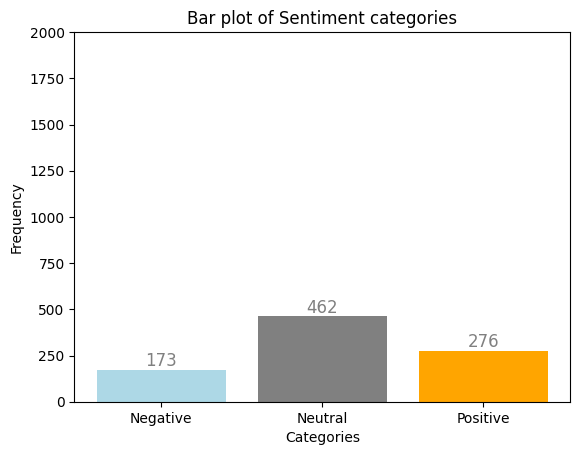

In [18]:
#[1] 감정분석 결과 막대그래프 (부정, 중립, 긍정)

print('* Negative Flag: ', dfsentiment['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment['PosFlag'].sum()+dfsentiment['NeuFlag'].sum()+dfsentiment['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 2000)
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()


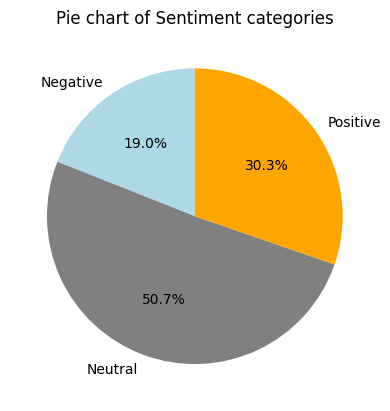

In [19]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()


#<font color = 'brown'> **🐹 Code lines with error messages below. I can ignore the following for the time being.**

In [8]:
#데이터 전처리: 책 > 문장단위로 (챕터가 문장단위로 나뉜 상태)
# Creating a table breaking down the text by each sentence, rather than each chapter.
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer
# Make smaller table - reset index to prepare for further work
dfsentiment = df[['text']].reset_index() \
    .drop(["index"], axis=1)


dfsentiment = dfsentiment.join(dfsentiment.text.apply(sent_tokenize).rename('Sentences')) # Breaking apart text into sentences

#Put every tokenized sentence into its own row
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values
dfsentiment2

KeyError: ignored

In [9]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

# Read your CSV file with a single 'text' column
df = pd.read_csv('/content/sample_data/TheBerenstainBears.csv')  # Replace 'your_csv_file.csv' with the actual file path

# Tokenize the text by sentences and create a new DataFrame
dfsentiment = df['text'].apply(sent_tokenize).explode().reset_index(drop=True)

# Clean punctuation and convert to lowercase
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()

# Check the first five values
print(dfsentiment.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileNotFoundError: ignored

In [11]:
#문장별로 감정분석 점수 부여; Compound, positive, negative, neutral
# Get intensity scores of each sentence
dfsentiment['Score']=dfsentiment.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment['CompScore']=dfsentiment.Score.apply(lambda x: x.get("compound"))
dfsentiment['PosScore']=dfsentiment.Score.apply(lambda x: x.get("pos"))
dfsentiment['NegScore']=dfsentiment.Score.apply(lambda x: x.get("neg"))
dfsentiment['NeuScore']=dfsentiment.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment = dfsentiment.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

AttributeError: ignored

In [12]:
# 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral
# Get intensity scores of each sentence
dfsentiment['Score'] = dfsentiment.apply(lambda x: sid.polarity_scores(x))

# Place scores in their own columns
dfsentiment['CompScore'] = dfsentiment.Score.apply(lambda x: x.get("compound"))
dfsentiment['PosScore'] = dfsentiment.Score.apply(lambda x: x.get("pos"))
dfsentiment['NegScore'] = dfsentiment.Score.apply(lambda x: x.get("neg"))
dfsentiment['NeuScore'] = dfsentiment.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original Score field can be removed
dfsentiment = dfsentiment.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

AttributeError: ignored

In [13]:
# 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral
# Get intensity scores of each sentence
dfsentiment['Score'] = dfsentiment.apply(lambda x: sid.polarity_scores(x))

# Place scores in their own columns
dfsentiment['CompScore'] = dfsentiment.Score.apply(lambda x: x.get("compound"))
dfsentiment['PosScore'] = dfsentiment.Score.apply(lambda x: x.get("pos"))
dfsentiment['NegScore'] = dfsentiment.Score.apply(lambda x: x.get("neg"))
dfsentiment['NeuScore'] = dfsentiment.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original Score field can be removed
dfsentiment = dfsentiment.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

AttributeError: ignored

In [14]:
# 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral
# Get intensity scores of each sentence
dfsentiment['Score'] = dfsentiment.apply(lambda x: sid.polarity_scores(x)['compound'])

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment['Score'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['Score'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['Score'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

AttributeError: ignored

In [15]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read your CSV file with a single 'text' column
df = pd.read_csv('/content/sample_data/TheBerenstainBears.csv')  # Replace 'your_csv_file.csv' with the actual file path

# Tokenize the text by sentences and create a new DataFrame
dfsentiment = df['text'].apply(sent_tokenize).explode().reset_index(drop=True)

# Clean punctuation and convert to lowercase
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()

# Check the first five values
print(dfsentiment.head())

# Initialize the VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Custom function to calculate the compound score for each sentence
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']

# Calculate the compound score for each sentence
dfsentiment['Score'] = dfsentiment.apply(calculate_compound_score)

# Place scores in own columns
dfsentiment['CompScore']=dfsentiment.Score.apply(lambda x: x.get("compound"))
dfsentiment['PosScore']=dfsentiment.Score.apply(lambda x: x.get("pos"))
dfsentiment['NegScore']=dfsentiment.Score.apply(lambda x: x.get("neg"))
dfsentiment['NeuScore']=dfsentiment.Score.apply(lambda x: x.get("neu"))

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment['Score'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['Score'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['Score'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

dfsentiment.head(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileNotFoundError: ignored

#<font color = 'green'> **🐹 WIERED**

**Reference**
[url link 1](https://github.com/ms624atyale/Python_Basics/blob/main/28_Tokenization_VariousWays.ipynb)

🐹 5. PorterStemmer() for Stemming
Tokenize words and all kinds of punctuations

🐹 6. RegexpTokenizer() with a regular expression as an argument
Tokenize words exclusively with preserving capital

🐹 7. LancasterStemmer() for Lemmatization
Tokenize words excclusively without single quotes by default. Fix the original [rul link 2](https://github.com/ms624atyale/Python_Basics/blob/main/29_STwordsPOSCollocationConcordanceWC_ModifiedfromHSNam95_Junkyuhufs.ipynb)

In [ ]:
# url link 와 결과가 다름????? 왜??? 다시 살펴봐야함

from nltk.stem import WordNetLemmatizer # 일부 활용만 복원 (e.g., inflectional morpheme '-s' for 3rd per. sg & plural; cf., no recovery from progressive)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in tktxt]

print('3인칭 단수 및 복수 굴절 삭제한 토큰화: %s' %tktxt)

[nltk_data] Downloading package wordnet to /root/nltk_data...


3인칭 단수 및 복수 굴절 삭제한 토큰화: ['1982', 'The', 'Berenstain', 'Bears', 'IN', 'THE', 'Dark', 'Stan', 'and', 'Jan', 'Berenstain', 'Brother', 'Bear', 'said', 'Sister', 'impatiently', 'are', 'you', 'going', 'to', 'take', 'all', 'day', 'to', 'pick', 'your', 'books', 'Sister', 'and', 'Brother', 'Bear', 'at', 'the', 'Bear', 'Country', 'Library', 'Sister', 'had', 'already', 'chosen', 'her', 'books', 'and', 'was', 'waiting', 'at', 'the', 'check', 'out', 'desk', 'Hold', 'your', 'horses', 'said', 'Brother', 'I', 'am', 'looking', 'for', 'a', 'good', 'mystery', 'Sister', 'Bear', 'usually', 'took', 'out', 'storybooks', 'and', 'books', 'about', 'nature', 'and', 'sometimes', 'books', 'of', 'poems', 'Brother', 'liked', 'those', 'too', 'but', 'lately', 'he', 'd', 'become', 'interested', 'in', 'mysteries', 'especially', 'spooky', 'ones', 'Hey', 'this', 'one', 'looks', 'good', 'he', 'said', 'finally', 'Okay', 'let', 's', 'check', 'out', 'Hmmm', 'said', 'Sister', 'looking', 'at', 'the', 'cover', 'It', 'was', 'call

In [ ]:
obj = txt.replace("\n", " ")
print('줄바꿈 없는 쿤장 토큰화:%s' %obj)

줄바꿈 없는 쿤장 토큰화:﻿1982 The Berenstain Bears IN THE Dark Stan and Jan Berenstain 	“Brother Bear,” said Sister impatiently, “are you going to take all day to pick your books?” 	Sister and Brother Bear at the Bear Country Library. Sister had already chosen her books and was waiting at the check-out desk.  	“Hold your horses,” said Brother. “I am looking for a good mystery.” 	Sister Bear usually took out storybooks and books about nature–and sometimes books of poems. Brother liked those, too, but lately he’d become interested in mysteries–especially spooky ones. 	“Hey, this one looks good,” he said finally. “Okay, let’s check out.” 	“Hmmm,” said Sister, looking at the cover. It was called The Case of the Crying Cave. “It looks scary to me!” 	“Say! This is really good!” said Brother later that evening when the Bear family had settled down for some reading. “Would you like me to read it to you?” he asked Sister.  	Sister was looking at a storybook about three kittens who were arguing about whic

In [ ]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
tktxt = retokenize.tokenize(obj)

print('Tokenizing Words with RegexpTokenizer: %s' %tktxt)

Tokenizing Words with RegexpTokenizer: ['1982', 'The', 'Berenstain', 'Bears', 'IN', 'THE', 'Dark', 'Stan', 'and', 'Jan', 'Berenstain', 'Brother', 'Bear', 'said', 'Sister', 'impatiently', 'are', 'you', 'going', 'to', 'take', 'all', 'day', 'to', 'pick', 'your', 'books', 'Sister', 'and', 'Brother', 'Bear', 'at', 'the', 'Bear', 'Country', 'Library', 'Sister', 'had', 'already', 'chosen', 'her', 'books', 'and', 'was', 'waiting', 'at', 'the', 'check', 'out', 'desk', 'Hold', 'your', 'horses', 'said', 'Brother', 'I', 'am', 'looking', 'for', 'a', 'good', 'mystery', 'Sister', 'Bear', 'usually', 'took', 'out', 'storybooks', 'and', 'books', 'about', 'nature', 'and', 'sometimes', 'books', 'of', 'poems', 'Brother', 'liked', 'those', 'too', 'but', 'lately', 'he', 'd', 'become', 'interested', 'in', 'mysteries', 'especially', 'spooky', 'ones', 'Hey', 'this', 'one', 'looks', 'good', 'he', 'said', 'finally', 'Okay', 'let', 's', 'check', 'out', 'Hmmm', 'said', 'Sister', 'looking', 'at', 'the', 'cover', 'It

In [ ]:
#이렇게 하니까 오류 났음. 파일 내용이 아닌, 파일 경로가 텍스트로 인식되었음.
from nltk.tokenize import RegexpTokenizer

# Define the path to your input text file
input_file_path = '/content/sample_data/BerenstainBears_Text_01SEP23.txt'

# Read the content of the input text file
with open(input_file_path, 'r') as file:
    obj = file.read()

# Create a regular expression tokenizer
retokenize = RegexpTokenizer(r'\w+')

# Tokenize the input text
tokens = retokenize.tokenize(obj)

# Define the path for the output text file
output_file_path = 'tokenized_text.txt'

# Save the tokens to the output file
with open(output_file_path, 'w') as outfile:
    outfile.write('\n'.join(tokens))

print(f"Tokenized text saved to {output_file_path}")

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def convert_capitalized_to_lowercase(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            # Tokenize each line into words
            words = word_tokenize(line)

            # Initialize an empty list to store the transformed words
            transformed_words = []

            for word in words:
                # Check if the word is entirely capitalized
                if word.isupper():
                    # Convert the capitalized word to lowercase
                    transformed_words.append(word.lower())
                else:
                    # Keep the word as it is
                    transformed_words.append(word)

            # Join the transformed words back into a single line
            transformed_line = ' '.join(transformed_words)

            # Write the transformed line to the output file
            outfile.write(transformed_line + '\n')

# Example usage:
input_file = 'tokenized_text.txt'  # Replace with the path to your input file
output_file = 'output_tokenized_small.txt'  # Replace with the path to your output file
convert_capitalized_to_lowercase(input_file, output_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#감성 분석에서는 굳이 소문자 변환이 필요 없겠지만, 아래 코드로 파일의 텍스트 단어가 소문자화 되지는 않는다. 게다가 토큰화 되었던 단어가 다시 문장호 단락화 되었다.
# Define the path to your input text file
input_file_path = '/content/sample_data/BerenstainBears_Text_01SEP23.txt'

# Read the content of the input text file
with open(input_file_path, 'r') as file:
    obj = file.read()

# Tokenize the input text by splitting on spaces
words = obj.split()

# Convert capitalized words to lowercase and join the words back into a single string
transformed_text = ' '.join(word.lower() if word.isupper() else word for word in words)

# Define the path for the output text file
output_file_path = 'tokenized_text_small.txt'

# Save the transformed text to the output file
with open(output_file_path, 'w') as outfile:
    outfile.write(transformed_text)

print(f"Transformed text saved to {output_file_path}")


Transformed text saved to tokenized_text_small.txt
